---

# <center><span style="color:red"> Practica 2: Análisis de extremos, análisis espectral y filtros</center></span>

---

In [25]:
# módulos necesarios
# modulos propios de python
import math
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')


# módulos de lectura y tratamiento de datos
import pandas  as pd
import numpy   as np
import netCDF4 as nc
import xarray  as xr

# estadistica
from scipy import stats
from scipy import special


# librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn           as sns
import cartopy.crs       as ccrs

## <span style="color:green"> Objetivo 1: Análisis de Extremos </span>

<span style='color:black'>En esta primera parte de la práctica 2 se pretende analizar algunos índices de extremos de temperatura o precipitación en las regiones definidas empleando bases de datos de temperatura o precipitacion.
</span>

In [26]:
# carpeta donde tengo los datos
folder = 'data/'

# abro y leo datos de mínima temperatura diaria
temp_min = xr.open_dataset(f'{folder}tmin_pen.nc')
temp_max = xr.open_dataset(f'{folder}tmax_pen.nc')

In [27]:
# acoto los datos a las latitudes y longitudes correspondientes al norte
lats  = [43.8, 42.5]
longs = [-6.0, 0.0]

# selecciono los datos con los que voy a tratar
temp_min = temp_min.sel(lon=slice(longs[0], longs[1]), lat=slice(lats[0], lats[1]),
                        Time=slice(datetime(1973, 1, 1), datetime(2015, 1, 1)))
temp_max = temp_max.sel(lon=slice(longs[0], longs[1]), lat=slice(lats[0], lats[1]),
                        Time=slice(datetime(1973, 1, 1), datetime(2015, 1, 1)))
# separamos los datos en dos periodos
temp_min_1 = temp_min.sel(Time=slice('1973', '1994'))
temp_max_1 = temp_max.sel(Time=slice('1973', '1994'))

temp_min_2 = temp_min.sel(Time=slice('1995', '2015'))
temp_max_2 = temp_max.sel(Time=slice('1995', '2015'))


### <span style="color:darkblue"> Cold Nights </span>

In [28]:
# cold nights
# calculo de 10th percentile para mi región
qt_dims = ("Time")
qt_values = (0.1)

# calculo de los cuantiles para cada subset
ds_qt_1 = temp_min_1.quantile(qt_values, dim=qt_dims)
ds_qt_2 = temp_min_2.quantile(qt_values, dim=qt_dims)

# calculo cual va a ser el valor del quantil sup y inferior
minimo = np.min((ds_qt_1.min().tn, ds_qt_2.min().tn))
maximo = np.max((ds_qt_1.max().tn, ds_qt_2.max().tn))

In [29]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_min_1.tn < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_min_1.tn.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)

In [30]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_min_2.tn < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_min_2.tn.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el primer periodo')

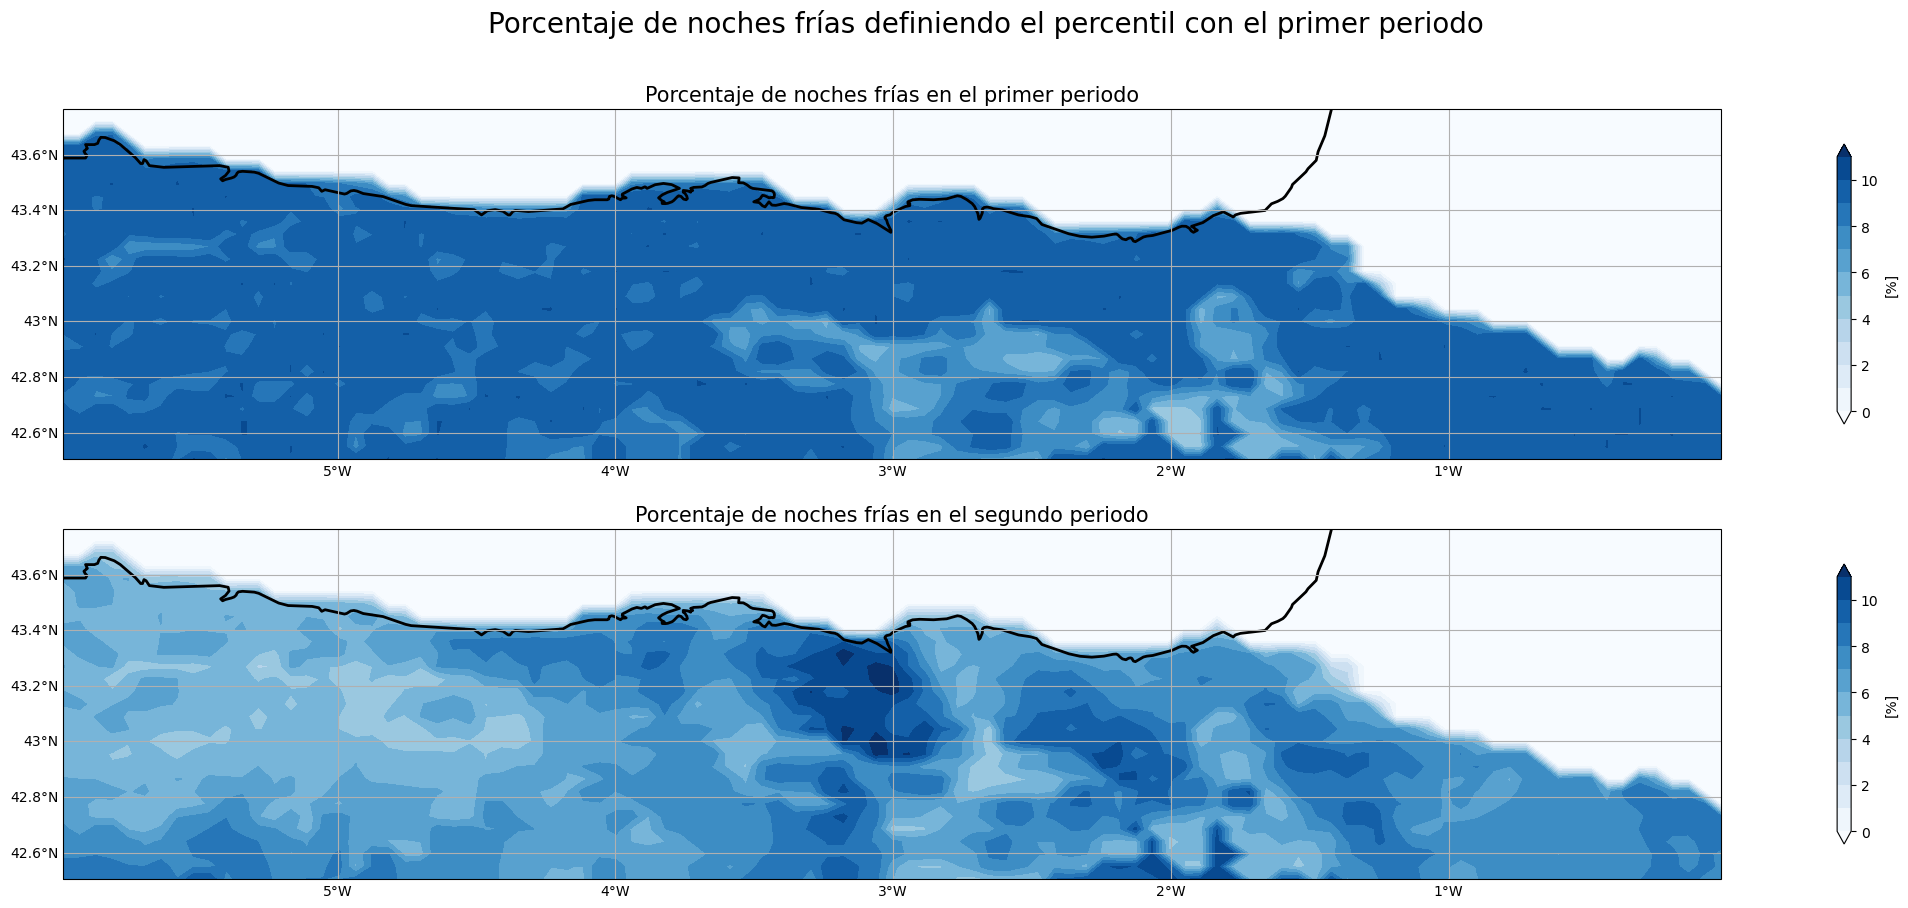

In [31]:
# Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)


gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False


gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False
 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi) 
ax2.coastlines(linewidth = 2)
ax1.coastlines(linewidth = 2)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el primer periodo',
             fontsize = 20)

In [32]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_min_1.tn < ds_qt_2.to_array() , 1, 0), axis=0)

n = temp_min_1.tn.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)


In [33]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_min_2.tn < ds_qt_2.to_array() , 1, 0),axis=0)

n = temp_min_2.tn.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el segundo periodo')

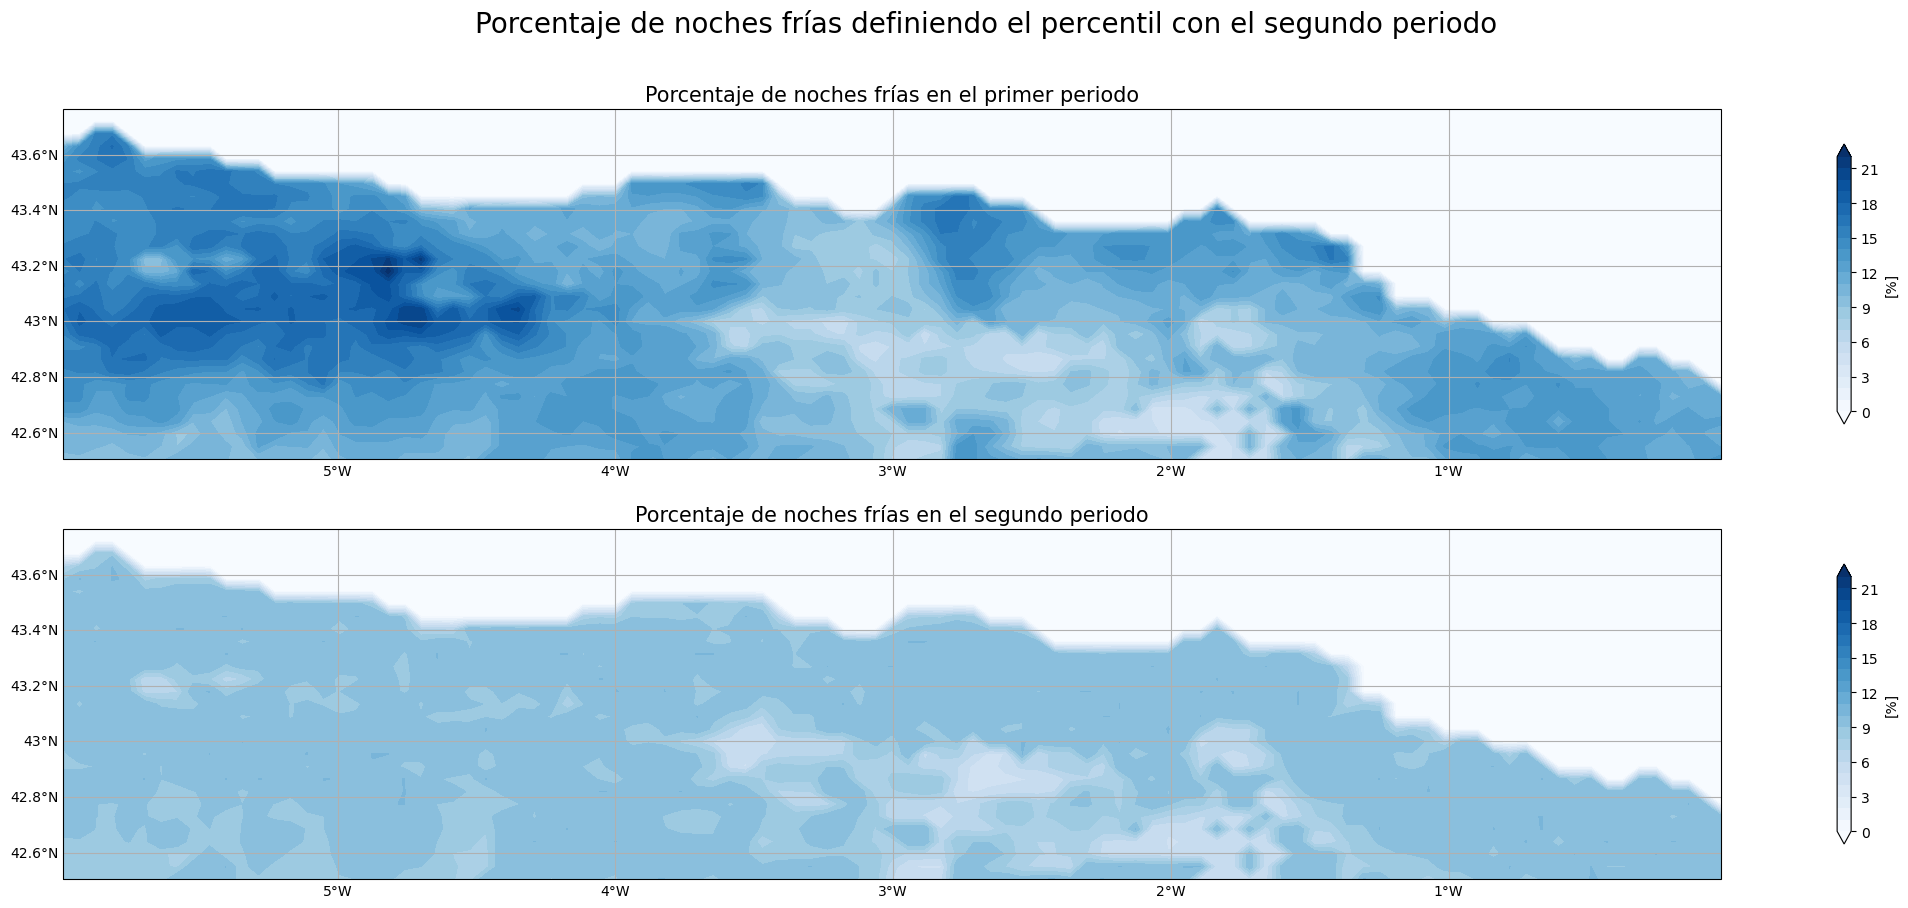

In [34]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)


gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False


gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)
ax1.coastlines(linewidth = 2)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi)
ax2.coastlines(linewidth = 2)

fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el segundo periodo',
             fontsize = 20)

### <span style="color:darkblue"> Cold Days </span>

In [35]:
# cold nights
# calculo de 10th percentile para mi región
qt_dims = ("Time")
qt_values = (0.1)

# calculo de los cuantiles para cada subset
ds_qt_1 = temp_max_1.quantile(qt_values, dim=qt_dims)
ds_qt_2 = temp_max_2.quantile(qt_values, dim=qt_dims)

# calculo cual va a ser el valor del quantil sup y inferior
minimo = np.min((ds_qt_1.min().tx, ds_qt_2.min().tx))
maximo = np.max((ds_qt_1.max().tx, ds_qt_2.max().tx))

In [36]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_max_1.tx < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_max_1.tx.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)


In [37]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_max_2.tx < ds_qt_1.to_array() , 1, 0),axis=0)

n = temp_max_2.tx.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de días fríos definiendo el percentil con el primer periodo')

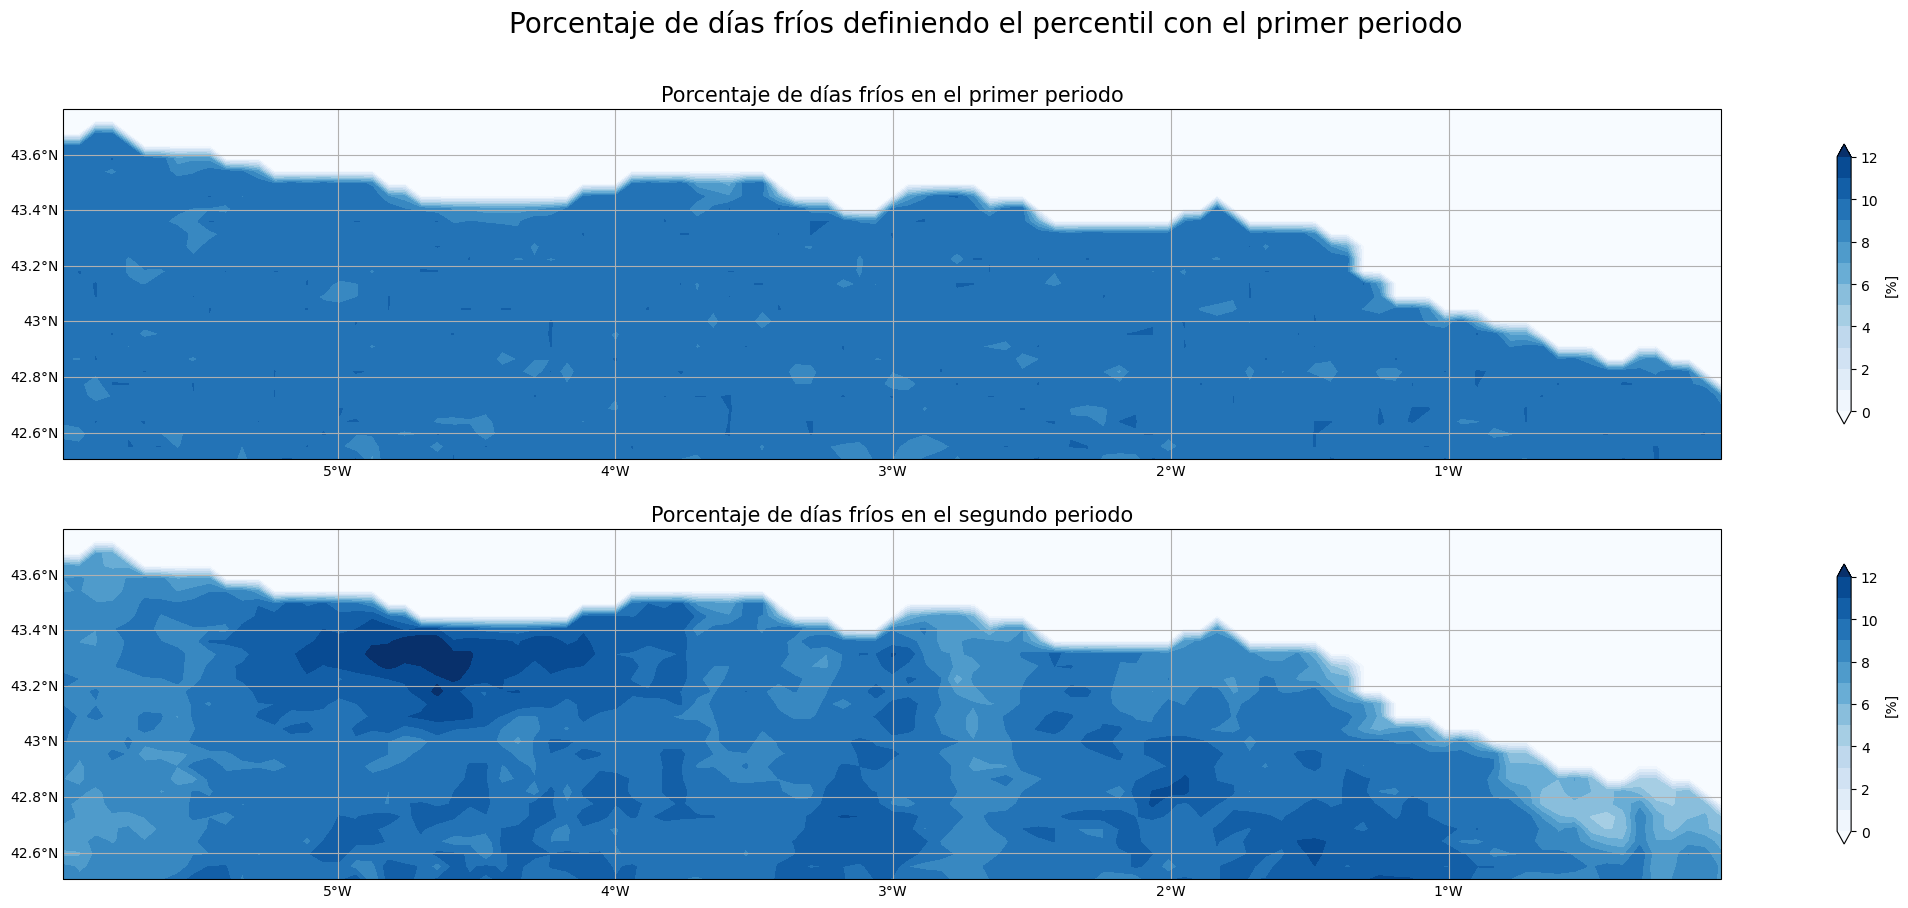

In [38]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

ax2.coastlines(linewidth = 2)
gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de días fríos en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de días fríos en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de días fríos definiendo el percentil con el primer periodo',
             fontsize = 20)

In [39]:
# para el primer periodo calculo del porcentaje de noches frías
num_cold_1 = np.sum(np.where(temp_max_1.tx < ds_qt_2.to_array() , 1, 0), axis=0)

n = temp_max_1.tx.shape[0]
perc_1 = num_cold_1*100/n
# elimino la dimension 1
perc_1 = np.squeeze(perc_1)


In [40]:
# para el segundo periodo calculo del porcentaje de noches frías
num_cold_2 = np.sum(np.where(temp_max_2.tx < ds_qt_2.to_array() , 1, 0),axis=0)

n = temp_max_2.tx.shape[0]
perc_2 = num_cold_2*100/n
# elimino la dimension 1
perc_2 = np.squeeze(perc_2)

# para hacer el grafico
mini = np.min((np.min(perc_1), np.min(perc_2)))
maxi = np.max((np.max(perc_1), np.max(perc_2)))

# latitud y longitud
lon = ds_qt_1.lon
lat = ds_qt_1.lat

Text(0.5, 0.98, 'Porcentaje de días fríos definiendo el percentil con el segundo periodo')

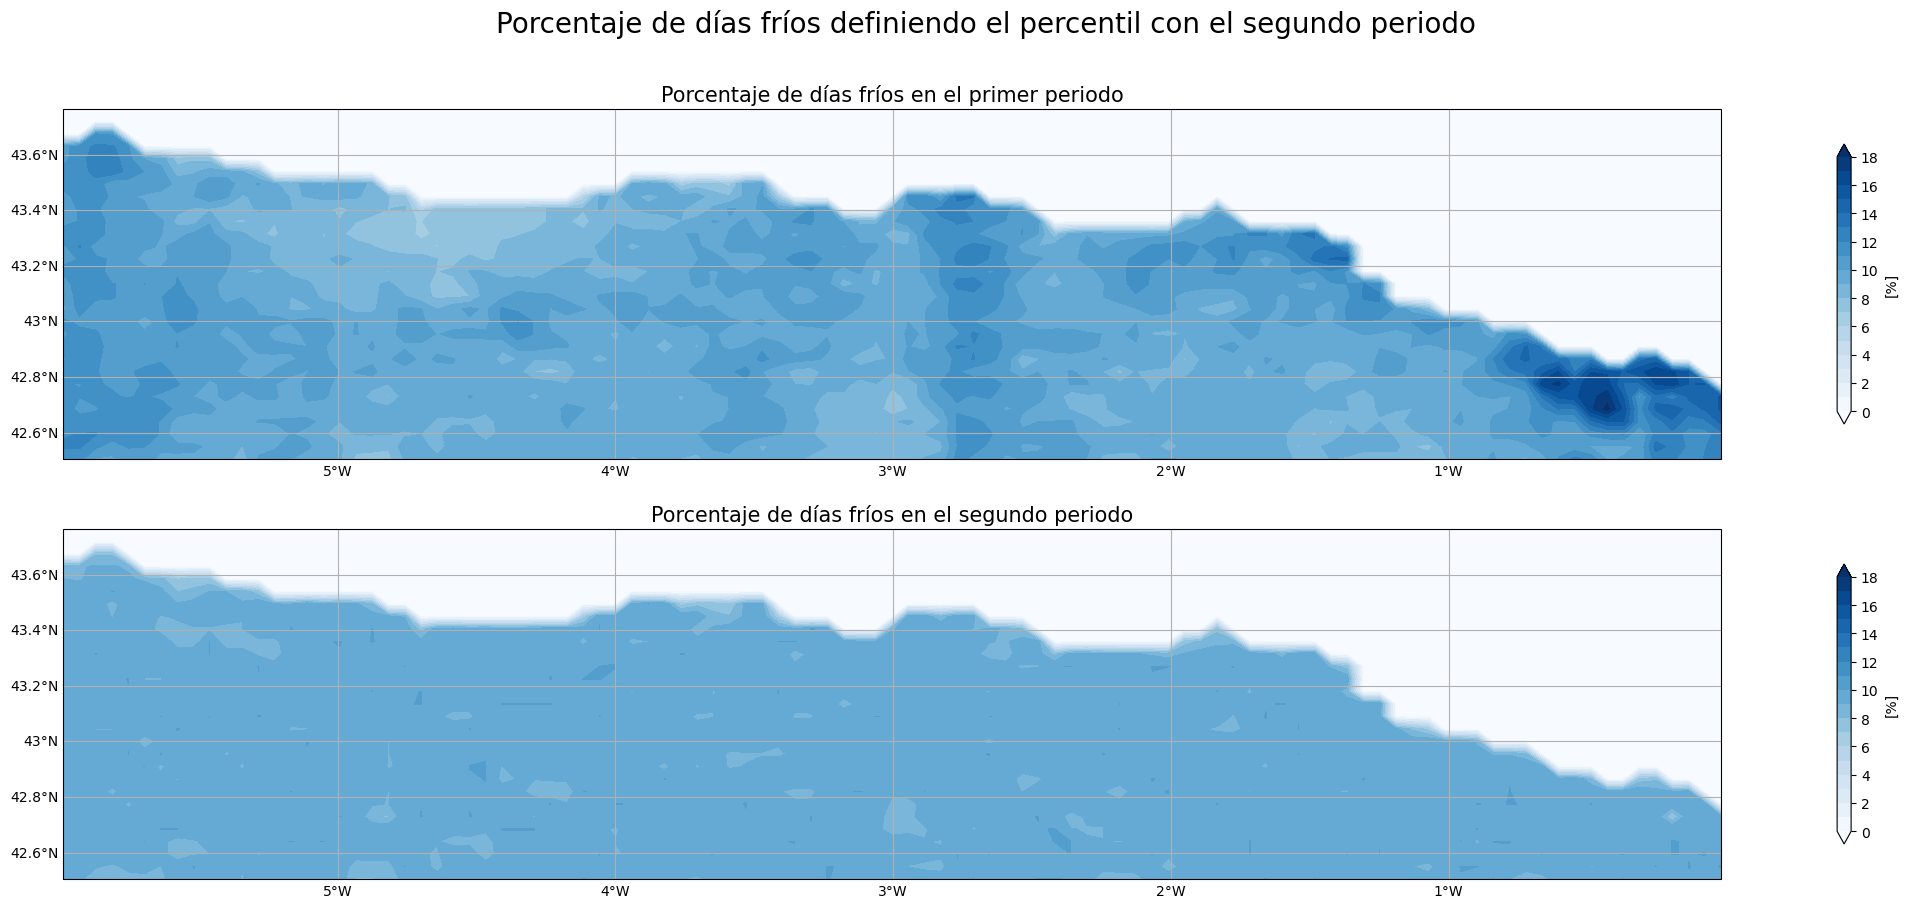

In [41]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=False) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

ax2.coastlines(linewidth = 2)
gl = ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top   = False

 
cmap= 'Blues'
unidades= '[%]'

im=ax1.contourf(lon, lat, perc_1, cbarticks,cmap = cmap, extend='both', 
                  vmin = mini, vmax = maxi)

im2=ax2.contourf(lon, lat, perc_2, cbarticks,cmap = cmap, extend='both', 
                   vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de días fríos en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de días fríos en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de días fríos definiendo el percentil con el segundo periodo',
             fontsize = 20)

### <span style="color:darkblue"> Periodo de Retorno </span>

In [42]:
# Funciones Belen
def nor(mu,sigma,x):
    #Nota: también podrías usar la función norm.pdf(x,k) del módulo stats del paquete scipy
    N=1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    return N

def GEV(x,c):
    #Función que calcula la función densidad de probabilidad de Generalized Extrem Value normalizada
    # con m = 0, s = 1
    #nota: también puedes usar g=stats.genextreme.pdf(x,-c)
    if ( abs(c) < 0.005 ) :
        g = np.exp(-np.exp(-x))*np.exp(-x)
    else:
        g = ( np.power( 1 + c * x , -1-1/c) ) * np.exp( - np.power(1 + c * x ,-1/c) )
    return g

def GEVms(x,c,m,s):
    #Función que calcula la función de densidad de probabilidad Generalizada Extreme Value sin normalizar
    y = ( x - m ) / s
    if ( abs(c) < 0.005 ) :
        g = ( np.exp(-np.exp(-y))*np.exp(-y) ) / s
    else:
        g = ( np.power( 1 + c * y , -1-1/c) ) * np.exp( - np.power(1 + c * y ,-1/c) ) / s
    return g

def GPDs(y,c,s):
    #Función que calcula la función de densidad de probabilidad de Pareto Generalizada 
    if (abs(c)<0.0001):
        h = np.exp(-y/s)*(1/s)
    else:
        h = (1/s) * ( 1 + c * y / s) ** (-1-1/c)
    h[y<=0]=0
    return h

def MLE_GEV(c,m,s,x):
    # Función que calcula la función likelihood sobre GEV con 
    # los parámetros de entrada c,m,s
    # y la muestra de datos x
    if ( (s < 0) | np.any(1 + c * (x-m)/s ) < 0):
        sal=1e7
    else:            
        if (abs(c) > 0.00001 ):
            t = (1 + c * (x-m)/s )**(-1/c)
        else :
            t = np.exp(-(x-m)/s)
        f = - np.log(s) + (c +1)*np.log(t) -t
        sal = f.sum()
    return -sal


def returnLevel(p, c,m,s):
    if (abs(c) > 0.00001 ):
        zp = m - ( s / c ) * ( 1 - ( - np.log( 1 - p ) ) ** ( - c ))
    else :
        zp = m - s * np.log( - np.log( 1 - p ) )
    return zp


def densityPlotGEV(ax,x,c,m,s):
    n, bins, dummy = ax.hist(x,density=True,label='Empirica')
    x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    ax.set_xlim(x1,x2)
    x_x = np.linspace(x1,x2,200)
    y_y = GEVms(x_x,c,m,s)
    ax.plot(x_x,y_y,'r',label='Ajuste')
    ax.legend()
    ax.grid()
    ax.set_ylabel('probabilidad f(z)')
    ax.set_xlabel('z')
    return

def probabilityPlot(ax,pExp,pTeor):
    ax.plot([0,1],[0,1])
    ax.plot(pExp,pTeor,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Probability plot')
    ax.grid()
    return

def quantilePlot(ax,xTeor,xSort):
    ax.plot([xSort[0],xSort[-1]],[xSort[0],xSort[-1]])
    ax.plot(xTeor,xSort,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Quantile plot')
    ax.grid()
    return

def returnPlot(ax,p,zp,pExp,xSort):
    ax.semilogx(1/p,zp)
    ax.grid()
    ax.set_xlim(1e-1,1e3)
    ax.semilogx(1/pExp,xSort,'o')
    ax.set_title('Return level plot')
    ax.set_xlabel('Return period (years)')
    ax.set_ylabel('Return level')
    return
    
def diagnosticsGEV(x,c,m,s):
    y = (x-m)/s
    ySort = np.sort(y)
    pExp = np.arange(1,ySort.size+1,1)/(ySort.size+1)
    pTeor = stats.genextreme.cdf(ySort,-c)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    xTeor = returnLevel(1-pExp, c,m,s)    
    p = np.logspace(-2, -1e-2, 100)
    zp=returnLevel(p,c,m,s)
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    returnPlot(ax[1,0],p,zp,pExpinv,xSort)
    densityPlotGEV(ax[1,1],x,c,m,s)
    fig.suptitle('Diagnostics',weight='bold',fontsize=18)
    return

def diagnosticsGPD(x,c,m,s,numYears):
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle('Diagnostics',weight='bold',fontsize=18)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    rv = stats.genpareto(c,m,s)
    pTeor = rv.cdf(xSort)
    xTeor = rv.ppf(pExp)
    fac = x.size / numYears
    p = np.logspace(-4, 2 , 100)
    zp = rv.ppf(1-p)
    fac = x.size / numYears
    returnPlot(ax[1,0],p*fac,zp,pExpinv*fac,xSort)
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    densityPlotGPD(ax[1,1],x,c,m,s)
    return

def densityPlotGPD(ax,x,c,m,s):
    n, bins, dummy = ax.hist(x,density=True,label='Empirica')
    x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    ax.set_xlim(x1,x2)
    x_x = np.linspace(x1,x2,200)
    y_y = stats.genpareto.pdf(x_x,c,m,s)
    ax.plot(x_x,y_y,'r',linewidth = 4, label='Ajuste')
    ax.legend()
    ax.grid()
    ax.set_ylabel('probabilidad h(x)')
    ax.set_xlabel('x')
    return
  

def readDataFrame(stationName):
    url = '../datos/isd/isd-history.csv'
    c=pd.read_csv(url)

    #Seleccionamos los años de inicio y final de lectura
    yearInit = 1973
    yearEnd = 2020

    #Construimos el código que necesitamos para bajar los datos de la estación:
    station=str(c.loc[(c['STATION NAME']==stationName)]['USAF'].values[0]) + '-' + \
            str(c.loc[(c['STATION NAME']==stationName)]['WBAN'].values[0])
    print('Seleccionada la estacion ' + stationName + ' con código ' + station)

    #Definimos las columnas y el tipo de dato que va a tener el DataFrame donde vamos a alojar los datos de la estación
    colNames=['year','month','day','hour','temp','tempd','slp','windDir','windSpeed','cloud','pcp1h','pcp6h']
    dataType=['int','int','int','int','float','float','int','int','int','int','int','int',]

    #Definimos los límites de los caractéres donde están los datos en los archivos que vamos a leer 
    #(Esta información está en: https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.txt)
    limits=[(0,4),(5,7),(8,10),(11,13),(14,19),(20,25),(26,31),(32,37),(38,43),(44,49),(50,55),(56,61)]
    
    #Lectura de los datos:
    df=pd.DataFrame(columns=colNames)
    for iyr in range(yearInit, yearEnd, 1):
        fil='../datos/isd/'+station+'-'+str(iyr)+'.gz'
        data= pd.read_fwf(fil,sep=' ',compression='gzip',head=0,
                     names=colNames,colspecs=limits)
        df = df.append(data)

    #Cambio el tipo de dato (porque los lee como objetos str y queremos que sean numéricos)
    dictType={ colNames[i] : dataType[i] for i in range(12)}
    data = df.astype(dictType,copy=True)
    #Los datos missing son -9999 en la base de datos: cambiamos por NaN:
    data = data.replace(-9999,np.NaN)
    
    dataDailyMax = data.groupby(['year','month','day']).max().drop(['hour'],axis=1).reset_index()
    dataDailyMax['time'] = pd.to_datetime(dataDailyMax[['year','month','day']],yearfirst=True)
    dataDailyMax = dataDailyMax.set_index('time')
    dataDailyCum = data.groupby(['year','month','day']).sum().drop(['hour'],axis=1).reset_index()
    dataDailyCum['time'] = pd.to_datetime(dataDailyCum[['year','month','day']],yearfirst=True)
    dataDailyCum = dataDailyCum.set_index('time')
    dataDailyMean = data.groupby(['year','month','day']).max().drop(['hour'],axis=1).reset_index()
    dataDailyMean['time'] = pd.to_datetime(dataDailyMean[['year','month','day']],yearfirst=True)
    dataDailyMean = dataDailyMean.set_index('time')
    return dataDailyMax


In [43]:
# Extremos por bloques
#===========================================================================================
# 1. Elegimos el tamaño de los bloques: de los datasets temp_min, temp_max
n = 1 #year

# voy a trabajar con pandas
df_min = temp_min.to_dataframe()

# deshago el multiindice
df_min.reset_index(inplace=True)

# Separo el dataset por años
df_min['year'] = df_min['Time'].dt.year

# elijo como índice la fecha
# df_min.set_index('Time', inplace=True)

# creo un lista de dataframes cada uno con datos de un año
list_df_years = [df_min[df_min['year'] == y] for y in df_min['year'].unique()]

# recuerda que los años can desde 1973 a 2015

In [44]:
# cojo el maximo de cada bloque de un año
list_of_max = [i.max()['tn'] for i in list_df_years]
len(list_of_max)

43

#### <span style='color:black'>Cold Nights</span>

In [91]:
# open data
percent_cold_nights_N = xr.open_dataarray(f'{folder}percent_cold_nights_N.nc')
tminR = tmin.sel(lat=slice(float(np.nanmax(percent.lat)),float(np.min(percent.lat))),
 lon=slice(float(np.min(percent.lon)),float(np.max(percent.lon))),Time=slice('1901','2014'))

In [93]:
def correct_series(percent, tmin = temp_min):

    tminR = tmin.sel(lat=slice(float(np.nanmax(percent.lat)),float(np.min(percent.lat))),lon=slice(float(np.min(percent.lon)),float(np.max(percent.lon))),Time=slice('1901','2015'))
    tminR_year = tminR.sel(Time=((tminR.Time.dt.month == 6) & (tminR.Time.dt.day == 1)))
    corr_R = np.where(np.isnan(tminR_year.to_array()), np.nan, percent)

    return np.nanmean(corr_R,axis=(1,2))

In [94]:
correct_series(percent = percent_cold_nights_N)

ValueError: operands could not be broadcast together with shapes (1,42,29,103) () (114,29,103) 

In [ ]:
# import scipy.stats as stats

x = df_min.dropna()
c, m, s = stats.genextreme.fit(pd.DataFrame(perc_2))
c = -c

print('MLE ='+'%.3f'%(MLE_GEV(c,m,s,x)))
print('c   = '+'%.3f'%(c))
print('m   = '+'%.3f'%(m))
print('s   = '+'%.3f'%(s))
print('100 yr return value = '+'%.3f'%(returnLevel(0.01,c,m,s)))
diagnosticsGEV(x,c,m,s)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## <span style="color:green"> Objetivo 2: Análisis de las periodicidades fundamentales de los extremos</span>